<a href="https://colab.research.google.com/github/allpedroza/python-dataanalysis/blob/main/bovespa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
#libraries
import pandas
import pandas_datareader as data
import plotly.graph_objs as graphObjs  

!pip install yfinance --upgrade --no-cache-dir
import yfinance
yfinance.pdr_override()

     |████████████████████████████████| 6.3MB 38.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=af987ed9f89225d555154339d537e16c3f5a61b0d670f1ac2385c1a4a1e2a4ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-ngjj1nqr/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [152]:
#leitura de dados
start_date = '2010-01-01'
end_date = '2021-05-30'

In [171]:
ibov =data.DataReader('^BVSP', 'yahoo', start_date, end_date)
BTC =data.DataReader('BTC-USD', 'yahoo', start_date, end_date)


In [172]:
ibov

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,70081.0,68587.0,68587.0,70045.0,1655400.0,70045.0
2010-01-05,70595.0,69928.0,70046.0,70240.0,1984200.0,70240.0
2010-01-06,70937.0,70016.0,70237.0,70729.0,2243600.0,70729.0
2010-01-07,70723.0,70045.0,70723.0,70451.0,1555000.0,70451.0
2010-01-08,70766.0,70158.0,70455.0,70263.0,1634400.0,70263.0
...,...,...,...,...,...,...
2021-05-24,124167.0,122526.0,122592.0,124032.0,8186300.0,124032.0
2021-05-25,124696.0,122701.0,124032.0,122988.0,8914500.0,122988.0
2021-05-26,124256.0,122988.0,122988.0,123989.0,8258400.0,123989.0


In [168]:
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-05-26,40379.617188,37247.902344,39316.890625,38436.968750,4.321097e+10,38436.968750
2021-05-27,38856.968750,34779.039062,38507.082031,35697.605469,5.520019e+10,35697.605469
2021-05-28,37234.500000,33693.929688,35684.156250,34616.066406,4.523101e+10,34616.066406


In [140]:
# rentabilidade = 100*preço atual \ preço anterior - 100
# rentabilidade = (preço atual- preço anterior)/ preço anterior

In [173]:
ibov['rentabilidade'] =  ibov['Close']/ibov['Close'].shift() *100 -100
BTC['rentabilidade'] =  ibov['Close']/ibov['Close'].shift() *100 -100

In [174]:
ibov

,High,Low,Open,Close,Volume,Adj Close,rentabilidade
Date,,,,,,,
2010-01-04,70081.0,68587.0,68587.0,70045.0,1655400.0,70045.0,NaN
2010-01-05,70595.0,69928.0,70046.0,70240.0,1984200.0,70240.0,0.278392
2010-01-06,70937.0,70016.0,70237.0,70729.0,2243600.0,70729.0,0.696185
2010-01-07,70723.0,70045.0,70723.0,70451.0,1555000.0,70451.0,-0.393050
2010-01-08,70766.0,70158.0,70455.0,70263.0,1634400.0,70263.0,-0.266852
...,...,...,...,...,...,...,...
2021-05-24,124167.0,122526.0,122592.0,124032.0,8186300.0,124032.0,1.174628
2021-05-25,124696.0,122701.0,124032.0,122988.0,8914500.0,122988.0,-0.841718
2021-05-26,124256.0,122988.0,122988.0,123989.0,8258400.0,123989.0,0.813901


In [175]:
BTC

,High,Low,Open,Close,Volume,Adj Close,rentabilidade
Date,,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015,2.012114
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002,-0.011841
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990,-1.241795
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992,-1.002158
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014,NaN
...,...,...,...,...,...,...,...
2021-05-26,40379.617188,37247.902344,39316.890625,38436.968750,4.321097e+10,38436.968750,0.813901
2021-05-27,38856.968750,34779.039062,38507.082031,35697.605469,5.520019e+10,35697.605469,0.304866
2021-05-28,37234.500000,33693.929688,35684.156250,34616.066406,4.523101e+10,34616.066406,0.960062


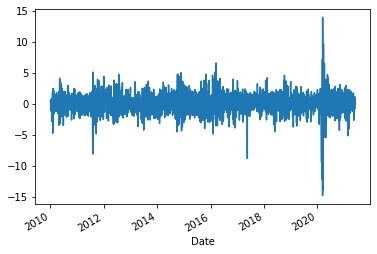

In [177]:
ibov['rentabilidade'].plot()


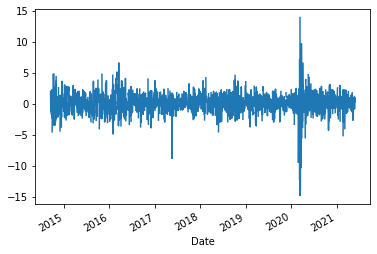

In [178]:
BTC['rentabilidade'].plot()

In [183]:
#medias moveis

ibov['mv_7d'] = ibov ['Close'].rolling(7).mean()
ibov['mv_21d'] = ibov ['Close'].rolling(21).mean()
ibov['mv_30d'] = ibov ['Close'].rolling(30).mean()
ibov['mv_50d'] = ibov ['Close'].rolling(50).mean()
ibov['mv_100d'] = ibov ['Close'].rolling(100).mean() 
ibov['mv_365d'] = ibov ['Close'].rolling(365).mean()

BTC['mv_7d'] = BTC ['Close'].rolling(7).mean()
BTC['mv_21d'] = BTC ['Close'].rolling(21).mean()
BTC['mv_30d'] = BTC ['Close'].rolling(30).mean()
BTC['mv_50d'] = BTC ['Close'].rolling(50).mean()
BTC['mv_100d'] = BTC ['Close'].rolling(100).mean() 
BTC['mv_365d'] = BTC ['Close'].rolling(365).mean()

In [180]:
ibov

,High,Low,Open,Close,Volume,Adj Close,rentabilidade,mv_7d,mv_21d,mv_30d,mv_50d,mv_100d,mv_365d
Date,,,,,,,,,,,,,
2010-01-04,70081.0,68587.0,68587.0,70045.0,1655400.0,70045.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,70595.0,69928.0,70046.0,70240.0,1984200.0,70240.0,0.278392,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,70937.0,70016.0,70237.0,70729.0,2243600.0,70729.0,0.696185,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,70723.0,70045.0,70723.0,70451.0,1555000.0,70451.0,-0.393050,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,70766.0,70158.0,70455.0,70263.0,1634400.0,70263.0,-0.266852,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,124167.0,122526.0,122592.0,124032.0,8186300.0,124032.0,1.174628,122822.857143,121118.523810,120820.166667,118737.14,118159.24,104555.638356
2021-05-25,124696.0,122701.0,124032.0,122988.0,8914500.0,122988.0,-0.841718,122981.000000,121232.476190,120959.366667,118913.70,118225.64,104599.279452
2021-05-26,124256.0,122988.0,122988.0,123989.0,8258400.0,123989.0,0.813901,123131.142857,121451.571429,121115.766667,119096.46,118286.96,104643.884932


In [184]:
BTC

,High,Low,Open,Close,Volume,Adj Close,rentabilidade,mv_7d,mv_21d,mv_30d,mv_50d,mv_100d,mv_365d
Date,,,,,,,,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015,2.012114,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002,-0.011841,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990,-1.241795,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992,-1.002158,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-26,40379.617188,37247.902344,39316.890625,38436.968750,4.321097e+10,38436.968750,0.813901,37778.753906,45600.178385,48751.573958,52089.541797,53284.104180,27214.726009
2021-05-27,38856.968750,34779.039062,38507.082031,35697.605469,5.520019e+10,35697.605469,0.304866,37549.170201,44568.807106,48114.004036,51637.014844,53119.590156,27288.125107
2021-05-28,37234.500000,33693.929688,35684.156250,34616.066406,4.523101e+10,34616.066406,0.960062,37131.946429,43417.011347,47482.702604,51164.436094,52948.952852,27358.758021


In [185]:
def plotCandleStick(df_,name='ticket', lines=[]):
  trace1 = {
      'x': df_.index,
      'open': df_.Open,
      'close': df_.Close,
      'high': df_.High,
      'low': df_.Low,
      'type': 'candlestick',
      'name':name,
      'showlegend':True
  }

  data = [trace1]
  layout = graphObjs.Layout()

  fig = graphObjs.Figure(data=data, layout=layout)

  if len(lines) > 0:
    print("size of variable lines is ",len(lines))
    for c in lines:
        fig.add_trace(
            graphObjs.Scatter(x = list (df_.index),
                              y = df_[c],
                              mode = 'lines',
                              name = c))
        
  return fig

In [187]:
plotCandleStick(BTC, name= 'BITCOIN', lines=['mv_7d','mv_21d','mv_30d','mv_50d','mv_100d','mv_365d'])


size of variable lines is  6


In [161]:
plotCandleStick(ibov, name= 'Ibovespa', lines=['mv_7d','mv_21d','mv_30d','mv_50d','mv_100d','mv_365d'])




size of variable lines is  6


In [162]:
ibov[ibov['mv_7d']>ibov['mv_100d']]

,High,Low,Open,Close,Volume,Adj Close,rentabilidade,mv_7d,mv_21d,mv_30d,mv_50d,mv_100d,mv_365d
Date,,,,,,,,,,,,,
2010-07-28,67051.0,66427.0,66670.0,66808.0,1939400.0,66808.0,0.200978,65848.000000,63593.142857,63899.066667,62958.70,65702.07,NaN
2010-07-29,67428.0,66596.0,66796.0,66954.0,2160200.0,66954.0,0.218537,66203.857143,63830.095238,63972.500000,63080.96,65683.14,NaN
2010-07-30,67608.0,66218.0,66951.0,67515.0,2088400.0,67515.0,0.837889,66637.857143,64143.380952,64071.633333,63237.48,65672.54,NaN
2010-08-02,68754.0,67524.0,67524.0,68517.0,1766600.0,68517.0,1.484115,67033.428571,64490.095238,64207.600000,63443.98,65661.95,NaN
2010-08-03,68561.0,67942.0,68517.0,67997.0,1900000.0,67997.0,-0.758936,67272.571429,64802.809524,64313.200000,63598.74,65642.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,124167.0,122526.0,122592.0,124032.0,8186300.0,124032.0,1.174628,122822.857143,121118.523810,120820.166667,118737.14,118159.24,104555.638356
2021-05-25,124696.0,122701.0,124032.0,122988.0,8914500.0,122988.0,-0.841718,122981.000000,121232.476190,120959.366667,118913.70,118225.64,104599.279452
2021-05-26,124256.0,122988.0,122988.0,123989.0,8258400.0,123989.0,0.813901,123131.142857,121451.571429,121115.766667,119096.46,118286.96,104643.884932


In [163]:
filtro_entrada = ibov['mv_7d'] > ibov['mv_100d']


In [164]:
def features_extraction(df_):
    df_.reset_index(inplace=True)
    df_['year']  = df_['Date'].dt.year 
    df_['month'] = df_['Date'].dt.month
    df_['day']   = df_['Date'].dt.day

In [165]:
features_extraction(ibov)
ibov.set_index('Date', inplace = True)

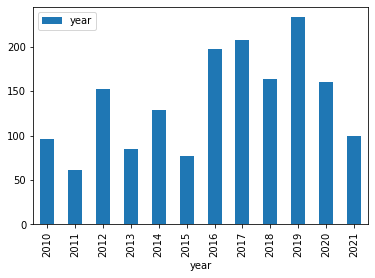

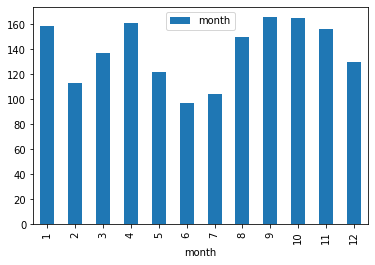

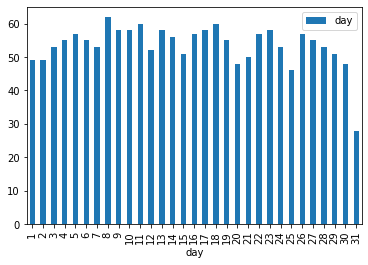

In [166]:
ibov[filtro_entrada].groupby('year').agg({'year':'count'}).plot(kind='bar') 
ibov[filtro_entrada].groupby('month').agg({'month':'count'}).plot(kind='bar')
ibov[filtro_entrada].groupby('day').agg({'day':'count'}).plot(kind='bar')

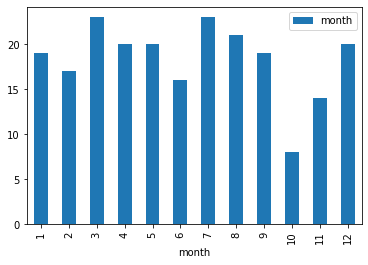